# Molecular Dynamics -- Lesson 2

In [1]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

from typing import Tuple, NewType


U = NewType("U", float)
dU = NewType("dU", float)


def harmonic_potential(x: float, k = 1) -> Tuple[U, dU]:
    return  (0.5 * k * x**2), (k * x) 


class Simulation():

    def __init__(self, settings):
        self._time_step = None
        self._total_steps = None
        
    def run(self, initial_condition) -> Tupe[float, float, float]:
        # General setting

        ns = 1000
        dt = 0.01

        k  = 2
        m  = 1 
        t0 = 0

        # Initial conditions
        t = t0
        x = np.random.random()
        v = np.random.random()

        U, dU = harmonic_potential(x, k)
        a = -dU / m

        for i in range(ns):
            # The step calculation.
            v += a * dt / 2
            x += v * dt 
            U , dU = harmonic_potential(x, k)
            a = - dU / m
            v += a * dt / 2 

            # Step done so update the time.
            t += dt

            # Store the calculated data.
            return t, x, v


In [2]:
plt.style.use('seaborn')
plt.style.use({'figure.dpi': 150, 'legend.frameon': True})


def plot_velocity_time_vs_velocity_position():
    plt.subplot(2, 1, 1)
    plt.plot(t_ps, x_ps, "b.")
    plt.ylabel('Position')
    plt.tick_params(labelbottom=False)

    plt.subplot(2, 1, 2)
    plt.plot(t_ps, v_ps, 'r.')
    plt.ylabel('Velocity')
    plt.xlabel('Time')

    plt.tight_layout()

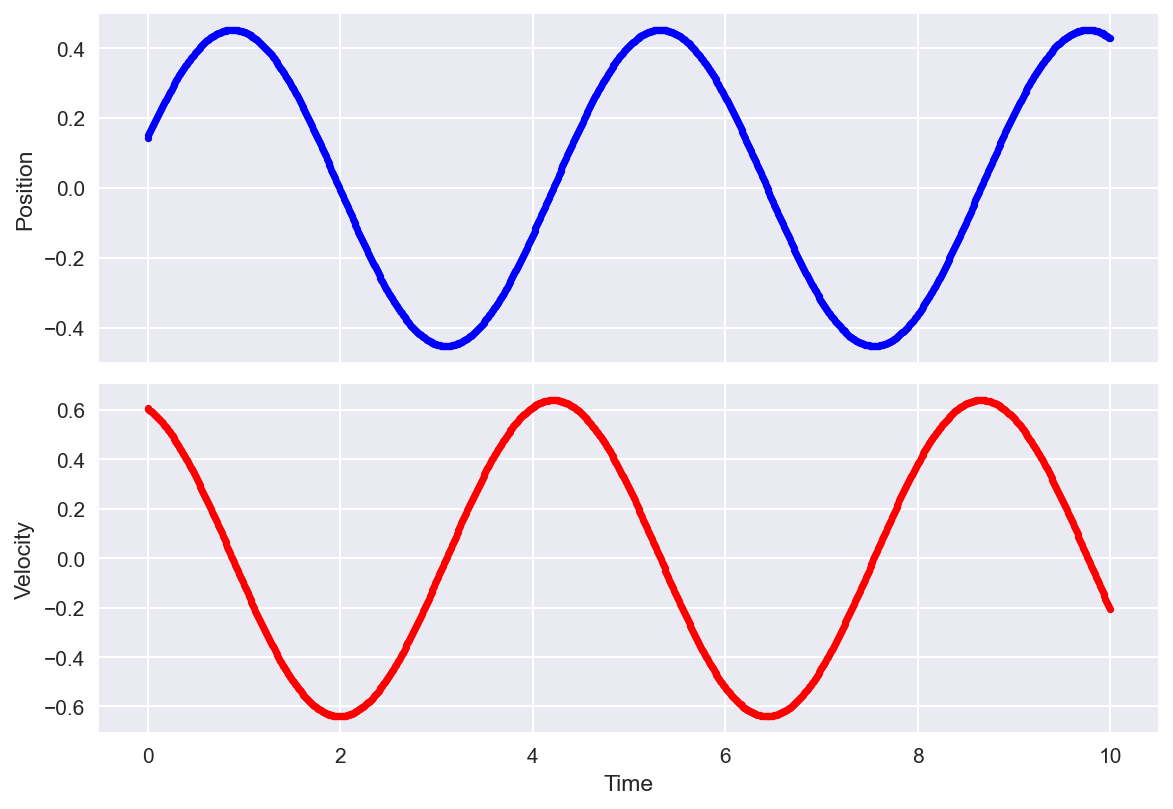

In [3]:
plot_velocity_time_vs_velocity_position()

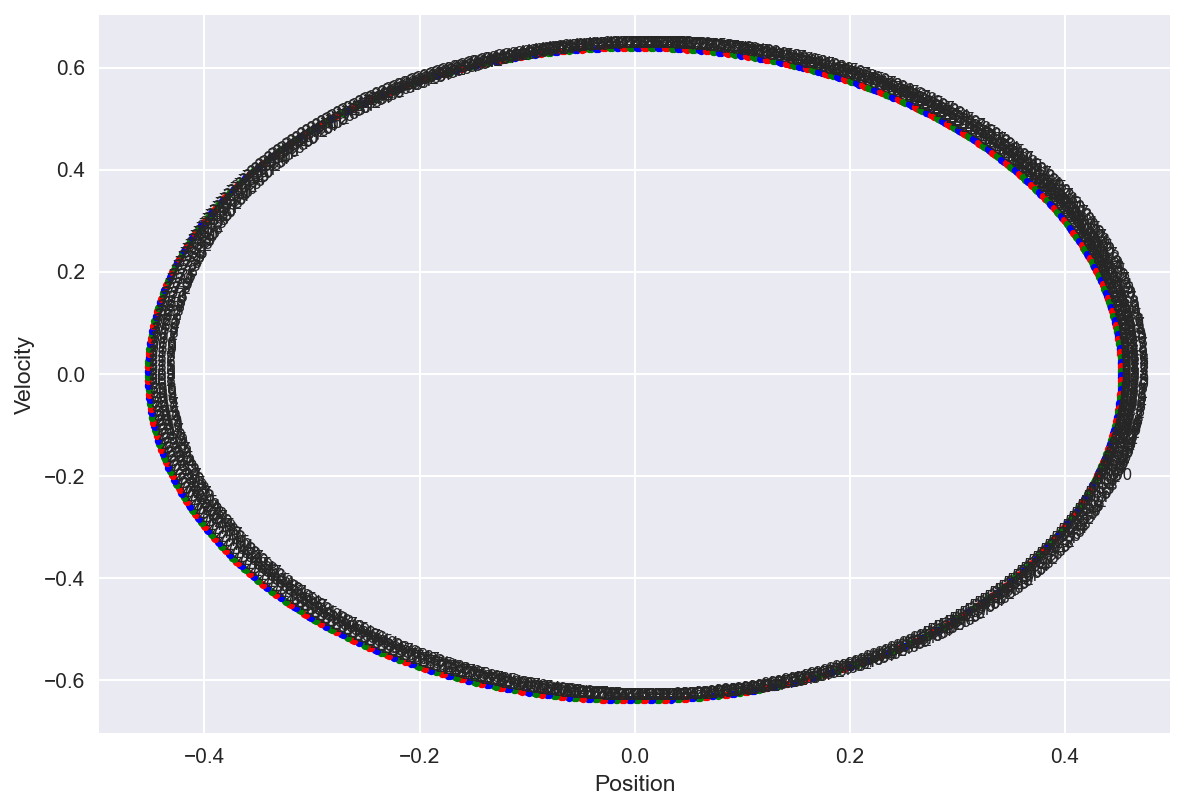

In [4]:
from itertools import zip_longest, cycle

colors = ['r','g','b']

for i, v in enumerate(zip(x_ps, v_ps, cycle(colors))):
    plt.plot(v[0], v[1], f"{v[2]}.")
    plt.annotate(i, size=8, xy=(v[0], v[1]))
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.tight_layout()

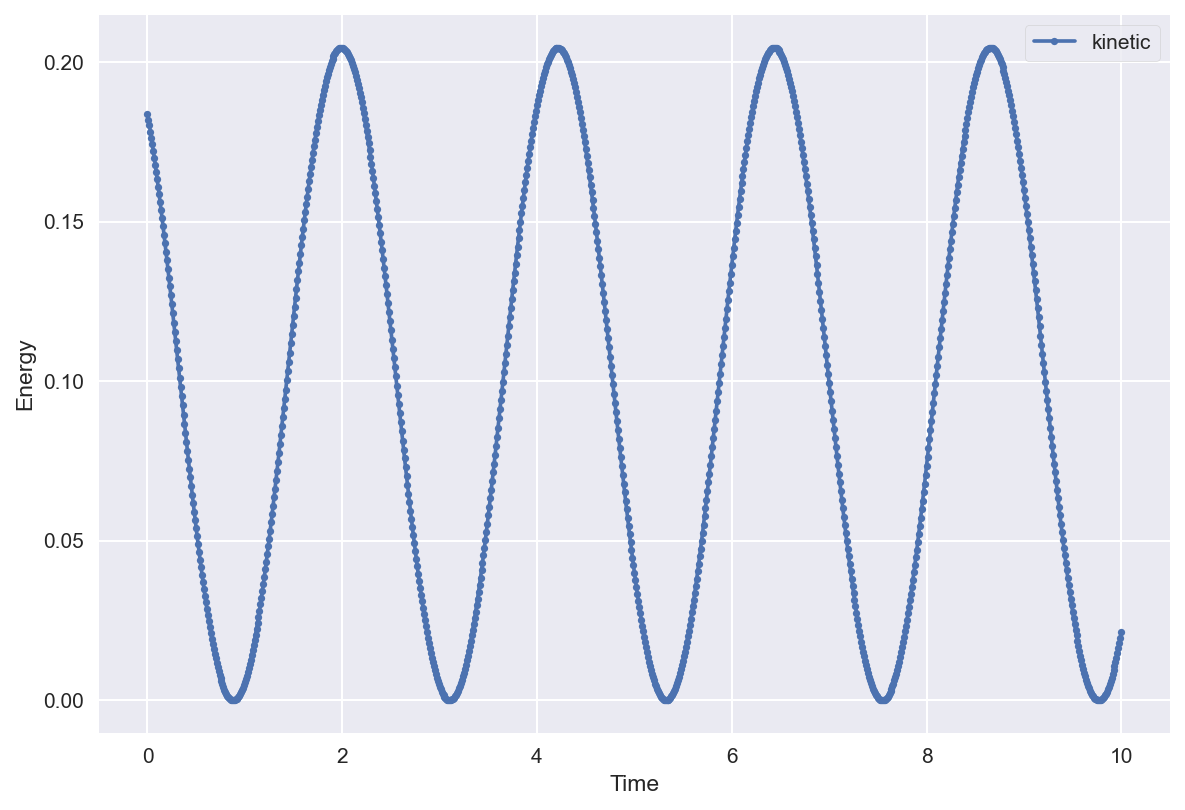

In [5]:
# calculate kinetic energy along trajectory
Ek = 0.5 * m * np.array(v_ps)**2

plt.plot(t_ps, Ek, '.-', label='kinetic')
# plt.plot(t_ps, Ep, '.-', label='potential')
# plt.plot(t_ps, Ek + Ep_ps, '.-', label='total')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')

plt.tight_layout()